In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [5]:
delivery=pd.read_csv('delivery_time.csv')

In [6]:
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
#eda and visualization
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


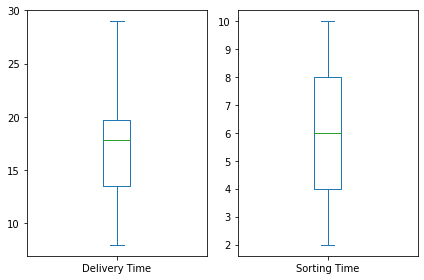

In [8]:
delivery.plot(kind='box',subplots=True)
plt.tight_layout();

In [9]:
Deli1=delivery.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)

In [10]:
Deli1.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

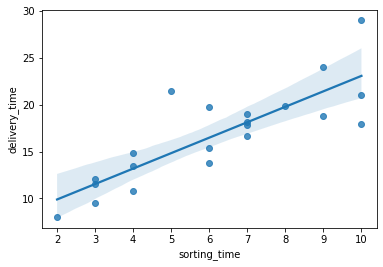

In [11]:
sns.regplot(x=Deli1['sorting_time'],y=Deli1['delivery_time'])

In [12]:
formula = 'delivery_time ~ sorting_time'
model = ols(formula=formula,data=Deli1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        18:58:33   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823   

In [13]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [18]:
 #Automatic Prediction for say sorting time 5, 8
data_pred=pd.DataFrame({'sorting_time':[5,10,4,8]})
data_pred

,sorting_time
0,5
1,10
2,4
3,8


In [19]:
model.predict(data_pred)

0    14.827833
1    23.072933
2    13.178814
3    19.774893
dtype: float64